In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.datasets import load_iris
from sklearn import tree

In [2]:
def calc_entropy(column):
    # Compute the counts of each unique value in the column
    counts = np.bincount(column)
    
    # Divide by the total column length to get a probability
    probabilities = counts / len(column)
    
    # Initialize the entropy to 0
    entropy = 0
    
    # Loop through the probabilities, and add each one to the total entropy
    for prob in probabilities:
        if prob > 0:
            # Use log from math and set base to 2
            entropy += prob * math.log(prob, 2)
    
    return -entropy

In [3]:
def calc_information_gain(data, split_name, target_name):
    # Calculate the original entropy
    original_entropy = calc_entropy(data[target_name])
    
    # Find the unique values in the column
    values = data[split_name].unique()
    
    # Initialize to_subtract
    to_subtract = 0
    
    # Loop through the unique values and calculate the subset entropies
    for value in values:
        subset = data[data[split_name] == value]
        prob = (subset.shape[0] / data.shape[0])
        to_subtract += prob * calc_entropy(subset[target_name])
    
    # Return information gain
    return original_entropy - to_subtract

In [4]:
def highest_info_gain(data, columns, target_name):
    # Initialize an empty dictionary for information gains
    information_gains = {}
    
    # Iterate through each column name in our list
    for col in columns:
        # Find the information gain for the column
        information_gain = calc_information_gain(data, col, target_name)
        # Add the information gain to our dictionary using the column name as the key
        information_gains[col] = information_gain
    
    # Return the key with the highest value
    return max(information_gains, key=information_gains.get)

In [5]:
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
target_column = 'target'
feature_columns = iris_df.columns[:-1]

In [6]:
# Find the feature with the highest information gain
best_feature = highest_info_gain(iris_df, feature_columns, target_column)

print(f"The feature with the highest information gain is: {best_feature}")

The feature with the highest information gain is: petal length (cm)


In [7]:
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.461538461538461

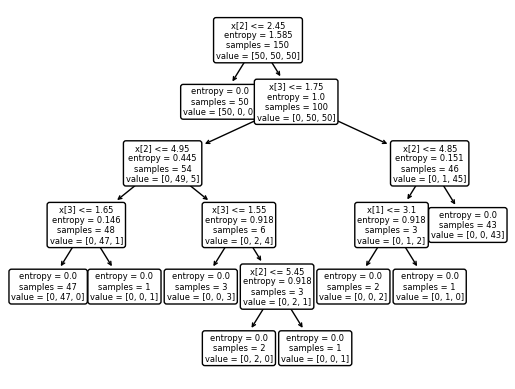

In [8]:
tree.plot_tree(clf, fontsize=6, rounded=True)